In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [18]:
df = pd.read_csv("azcabgptca.csv")

In [19]:
df

,Unnamed: 0,died,procedure,age,gender,los,type
0,1,0,1,73,0,51,0
1,2,0,0,67,0,30,1
2,3,0,1,69,0,43,0
3,4,0,1,65,0,32,0
4,5,0,1,79,0,42,1
...,...,...,...,...,...,...,...
1954,1955,0,1,77,0,6,1
1955,1956,0,1,77,0,5,0
1956,1957,0,1,78,0,5,0
1957,1958,1,1,73,0,1,0


In [4]:
df.shape

(1959, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1959 non-null   int64
 1   died        1959 non-null   int64
 2   procedure   1959 non-null   int64
 3   age         1959 non-null   int64
 4   gender      1959 non-null   int64
 5   los         1959 non-null   int64
 6   type        1959 non-null   int64
dtypes: int64(7)
memory usage: 107.3 KB


In [6]:
df.describe(include="all")

,Unnamed: 0,died,procedure,age,gender,los,type
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,980.000000,0.018377,0.474222,71.177642,0.692700,7.282797,0.456355
std,565.658908,0.134344,0.499463,4.024198,0.461492,5.601206,0.498219
min,1.000000,0.000000,0.000000,65.000000,0.000000,1.000000,0.000000
25%,490.500000,0.000000,0.000000,68.000000,0.000000,3.000000,0.000000
50%,980.000000,0.000000,0.000000,71.000000,1.000000,7.000000,0.000000
75%,1469.500000,0.000000,1.000000,74.000000,1.000000,10.000000,1.000000
max,1959.000000,1.000000,1.000000,79.000000,1.000000,51.000000,1.000000


In [25]:
df.died.value_counts().values[0]

1923

<AxesSubplot:xlabel='died', ylabel='count'>

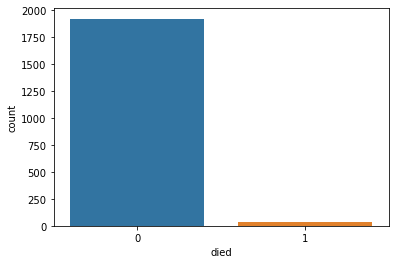

In [29]:
sns.countplot(x = df.died)

In [11]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['Unnamed: 0', 'died', 'procedure', 'age', 'gender', 'los', 'type'], dtype='object')

In [30]:
X = df.drop(['died'], axis=1)

y = df.pop('died')

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [40]:
rfcl = RandomForestClassifier(n_estimators=500, random_state=0)

In [41]:
rfcl.fit(X_train, train_labels)

RandomForestClassifier(n_estimators=500, random_state=0)

In [42]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [43]:
rfcl.score(X_train,train_labels)

1.0

In [44]:
round(rfcl.score(X_test, test_labels),2)

0.98

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

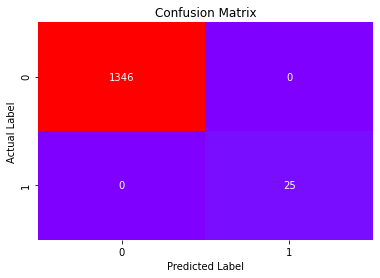

In [46]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

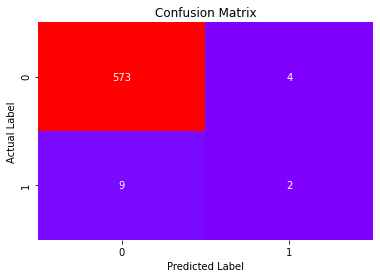

In [47]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
rfcl.score(X_test,test_labels)

0.9778911564625851

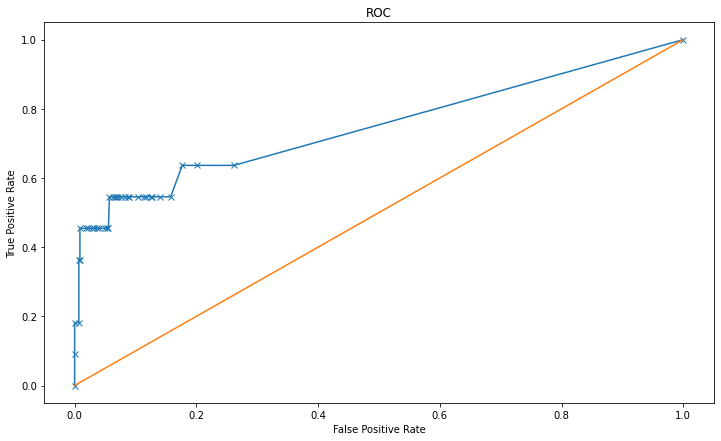

Area under Curve is 0.7482275090593982


In [50]:
#from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

In [51]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       577
           1       0.33      0.18      0.24        11

    accuracy                           0.98       588
   macro avg       0.66      0.59      0.61       588
weighted avg       0.97      0.98      0.97       588

